<a href="https://colab.research.google.com/github/Lidiia-Afanasieva/BinearClassification/blob/main/BinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from PIL import Image
import os
import seaborn as sns
import random

# Helper libraries
from IPython.core.pylabtools import figsize
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# FOR DATAS ABOUT CURRENT DIRECTORY

os.getcwd()  # return name of current directory
len(os.listdir())  # return list of files in directory

In [ ]:
# TEST

files = []
for i in range(1):
    files=[i for i in os.listdir() if os.path.isfile(i)]
    print(files)
    # Get the MD5 hash for each -- use a for loop to process each file
    # for file_name in files:

for i, j in enumerate(files[:100]):
    img = plt.imread('/content/drive/MyDrive/Test-Huckleberry' + j)
    plt.subplot(10,10,i+1)
    # plt.figure(figsize=(50,50))/
    plt.title(j.split('.')[0])
    plt.axis('off')
    plt.imshow(img)

In [25]:
# TO SHOW IMAGES PAIR

def magick(bluuuuaaa, ananasaaaa):
    global classes
    
    plt.figure(figsize=(8,8))

    for j, i in enumerate([bluuuuaaa, ananasaaaa]):
        plt.subplot(1, 2, j + 1)
        plt.title(classes[i[1]])
        plt.imshow(i[0])
        plt.axis('off')


In [5]:
# TO DOWNLOAD DATASET

def download_set(data_path, class_name):
    only_img_list = []

    for img in os.listdir(data_path):
        img_arr =  cv2.imread(os.path.join(data_path, img))
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
        only_img_list.append(img_arr)

    return only_img_list

In [ ]:
# FULL DATASET

train_prickle_dir = "/content/drive/MyDrive/Training-Pineapple"  # 490 but 492
train_huck_dir = "/content/drive/MyDrive/Training-Huckleberry"  # 492 but 490
test_prickle_dir = "/content/drive/MyDrive/Test-Pineapple"  # 166
test_huck_dir = "/content/drive/MyDrive/Test-Huckleberry"  # 166

directory = [train_prickle_dir, train_huck_dir, test_prickle_dir, test_huck_dir]

classes = ['Blue_one', 'Prickly_one']

train_base = []
test_base = []
temp_arr = []

only_img_list_tr = []
only_img_list_tt = []

for d_set_path in directory[:2]:
    print(d_set_path)
    os.chdir(d_set_path)
    current_class = 0 if 'Huckleberry' in d_set_path else 1
    only_img_list_tr.extend(download_set(os.getcwd(), current_class))
    temp_arr = download_set(os.getcwd(), current_class)
    print(len(temp_arr), current_class)
    train_base.extend([[i, current_class] for i in temp_arr])

for d_set_path in directory[2:]:
    os.chdir(d_set_path)
    current_class = 0 if 'Huckleberry' in d_set_path else 1
    only_img_list_tt.extend(download_set(os.getcwd(), current_class))
    temp_arr = download_set(os.getcwd(), current_class)
    test_base.extend([[i, current_class] for i in temp_arr])

magick(train_base[500], train_base[0])

In [ ]:
# BUILDING A RIGHT ARRAY MODE

random.shuffle(train_base)
random.shuffle(test_base)

img_size = 100

x_train = []
y_train = []

x_test = []
y_test = []

for img, cls in train_base:
    x_train.append(img)
    y_train.append(cls)
x_train = np.array(x_train)

for img, cls in test_base:
    x_test.append(img)
    y_test.append(cls)
x_test = np.array(x_test)

x_train = x_train.reshape(-1, img_size, img_size, 3)
x_train = x_train/255

x_test = x_test.reshape(-1, img_size, img_size, 3)
x_test = x_test/255

print(f'x_train shape is : {x_train.shape}')
print(f'x_test shape is : {x_test.shape}')

print(f'y_train shape is : {y_train}')
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
print(f'y_train shape is : {y_train.shape}')

y_test = to_categorical(y_test, num_classes = 2)

In [ ]:
# THE COOOOLEST CODE IN THE WORLD
# COUSE ITS WORKING
# ACTUALLY ITS BUILD NN ARCHITECTURE AND OPTIMISE IT WITH ADAM

from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)
print(f'x_train is : {len(x_train)}')
print(f'x_val is : {len(x_val)}')
print(f'y_train is : {len(y_train)}')
print(f'y_val is : {len(y_val)}')

from keras.utils.np_utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 10
batch_size = 32
datagen = ImageDataGenerator(featurewise_center=False, 
                             samplewise_center=False, 
                             featurewise_std_normalization=False, 
                             samplewise_std_normalization=False, 
                             zca_whitening=False, 
                             zca_epsilon=0.000001, 
                             rotation_range=0.5, 
                             width_shift_range=0, 
                             height_shift_range=0, 
                             brightness_range=None, 
                             shear_range=0, 
                             zoom_range=0.5, 
                             channel_shift_range=0, 
                             fill_mode='nearest', 
                             cval=0, 
                             horizontal_flip=False, 
                             vertical_flip=False)

datagen.fit(x_train)
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, steps_per_epoch=x_train.shape[0]//batch_size)

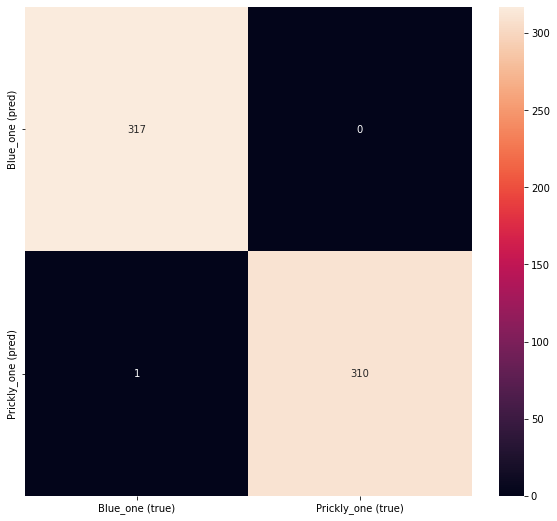

In [38]:
y_pred = model.predict(x_train)
y_pred_cls = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_train, axis=1)
conf_mat = confusion_matrix(y_true, y_pred_cls)
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(conf_mat, annot=True, fmt='.0f')
ax.set_xticklabels([item + ' (true)' for item in classes])
ax.set_yticklabels([item + ' (pred)' for item in classes])
plt.show()

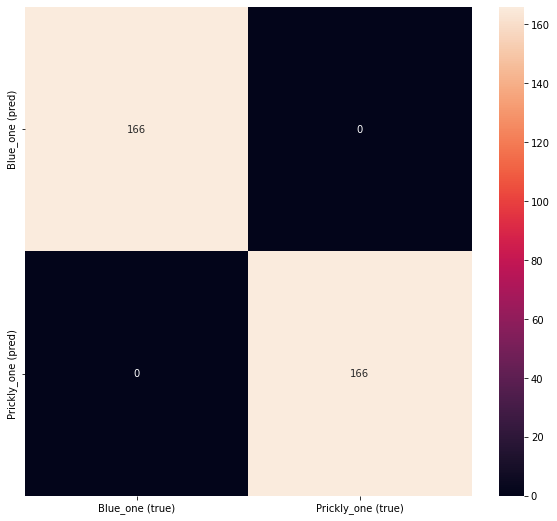

In [39]:
y_pred2 = model.predict(x_test)
y_pred_cls2 = np.argmax(y_pred2, axis=1)
y_true2 = np.argmax(y_test, axis=1)
conf_mat2 = confusion_matrix(y_true2, y_pred_cls2)
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(conf_mat2, annot=True, fmt='.0f')
ax.set_xticklabels([item + ' (true)' for item in classes])
ax.set_yticklabels([item + ' (pred)' for item in classes])
plt.show()

In [ ]:
# THIS IS NOT THE PLACE YOU ARE LOOKING FOOOOR

from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(f'x_train is : {len(x_train)}')
print(f'x_val is : {len(x_val)}')
print(f'y_train is : {len(y_train)}')
print(f'y_val is : {len(y_val)}')

from keras.utils.np_utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(15000, input_shape=(30000,), activation="sigmoid"))
model.add(Dense(7500, activation="sigmoid"))
model.add(Dense(2, activation="softmax"))

optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 10
batch_size = 32

# обучаем нейросеть
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32) 